# UNSUPERVISED LEARNING 2 PROJECT

## Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn_extra.cluster import KMedoids
from umap.umap_ import UMAP
import gensim


np.random.seed(2022203)

Pour le chargement des données, nous utiliserons le package sklearn.datasets de la manière ci-dessous

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

L'utilisation du TF-IDF score ce base sur l'hypothèse que tous les mots ont la même importance.
L'intuition derrière TF-IDF est la suivante : si un mot w apparaît plusieurs fois dans un document di mais n'apparaît pas beaucoup dans le reste des documents dj du corpus, alors le mot w doit être d'une grande importance pour le document di. L'importance de w devrait augmenter proportionnellement à sa fréquence dans di, mais en même temps, son importance devrait diminuer proportionnellement à la fréquence du mot dans d'autres documents dj du corpus. Mathématiquement, cela est capturé à l'aide de deux quantités : TF et IDF. Les deux sont ensuite combinés pour arriver au score TF-IDF.
TF (fréquence du terme) mesure la fréquence à laquelle un terme ou un mot apparaît dans un document donné. Étant donné que les différents documents dans le corpus peuvent avoir des longueurs différentes, un terme peut apparaître plus souvent dans un document plus long que dans un document plus court. Pour normaliser ces comptages, nous divisons le nombre d'occurrences par la longueur du document. TF d'un terme t dans un document d est défini comme :

$$TF (t, d) = \frac{ Number -  of - occurrences -of -term -t -in -document -d }{  Total -number -of -terms -in -the -document -d }$$


L'IDF (fréquence inverse de document, en français) mesure l'importance d'un terme dans l'ensemble d'un corpus. Lors du calcul de la fréquence de terme (TF), tous les termes sont considérés avec une importance égale. Cependant, il est bien connu que les mots vides (comme "est", "sont", "ai", etc.) ne sont pas importants, même s'ils se produisent fréquemment. Pour tenir compte de ces cas, l'IDF réduit le poids des termes qui sont très communs dans tout le corpus et augmente le poids des termes rares. L'IDF d'un terme t est calculé comme suit:


$$ IDF (t) = log_e( \frac{ Total -number -of -documents -in -the -corpus}{Number -of -documents -with -term -t -in -them}) $$

Le score est finalement :$$ TF-IDF score = TF * IDF$$


In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(newsgroups.data)

La sous partie des 1000 échantillons est extrait a l'aide de la fonction train_test_split de la librairie sklearn stratifié par le target

In [4]:
_, X_sample, _, y_sample = train_test_split(tfidf, newsgroups.target, stratify=newsgroups.target, test_size=1000)

Le cosine similarité, nous utiliserons la fonction cosine_similaty de sklearn également defini par :
Soit deux vecteurs A et B, le cosinus de leur angle θ s'obtient en prenant leur produit scalaire divisé par le produit de leurs normes :
$ {\displaystyle \cos \theta ={\frac {\mathbf {A} \cdot \mathbf {B} }{\|\mathbf {A} \|\|\mathbf {B} \|}}}$

In [5]:
def cosine_similarity_matrix(matrix):
    similarity_matrix = cosine_similarity(matrix)
    similarity_matrix = np.nan_to_num(similarity_matrix)
    return similarity_matrix

similarity_matrix = cosine_similarity_matrix(X_sample)

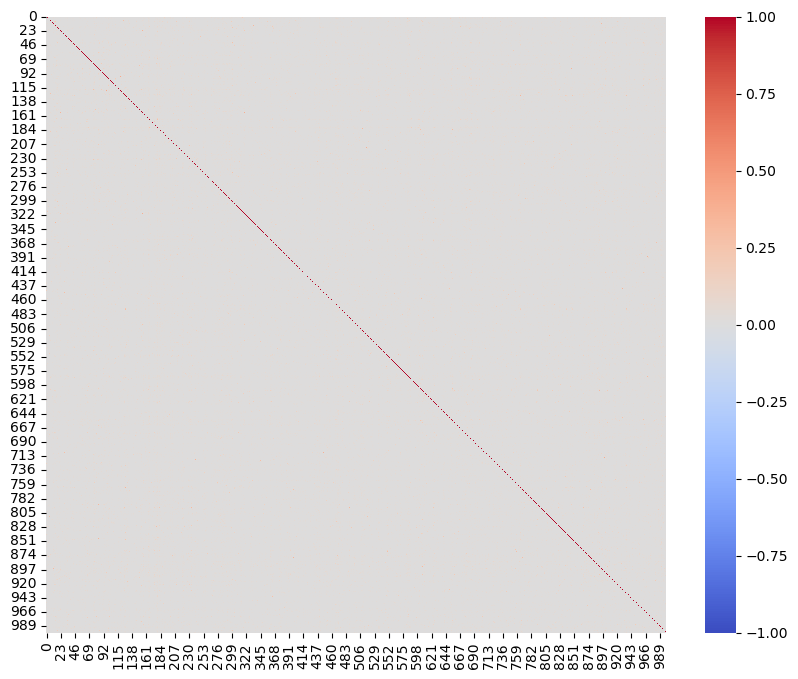

In [6]:
df = pd.DataFrame(similarity_matrix)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
plt.show()

Pour le tirage de l'ecahntillon de 500 éléments dans les 1000 précédents, il y'a plusieurs possibilités possibles parmis lesquelles
nous avons : 
- tirage aléaoire avec remise (replace = True)
- tirage aléaoire sans remise (replace = False)
- tirage aléatoire stratifié 

Mais pour ce qui nous concerne, nous utiliseons le tirage aléaoire sans remise (replace = False) avec random.choice.

In [7]:
word_indices = np.random.choice(X_sample.shape[1], size=500, replace=False)
X_sample_500_words = X_sample[:, word_indices]
X_sample_500_words = X_sample_500_words.toarray()

Pour le calcul du nombre de co-occurrence, nous procederons comme suite:
- transformer toutes les valeurs non nulles en 1 dans X_sample_500_words
- faire le produire matricille entre X_sample_500_words et sa transposée qui permet d'avoir des 1 lorsqu'il y'a matchingde 1 dans deux colonnes.

In [8]:
X_sample_500_words = np.where(X_sample_500_words != 0, 1, 0)
co_occurrence_matrix = X_sample_500_words.T @ X_sample_500_words

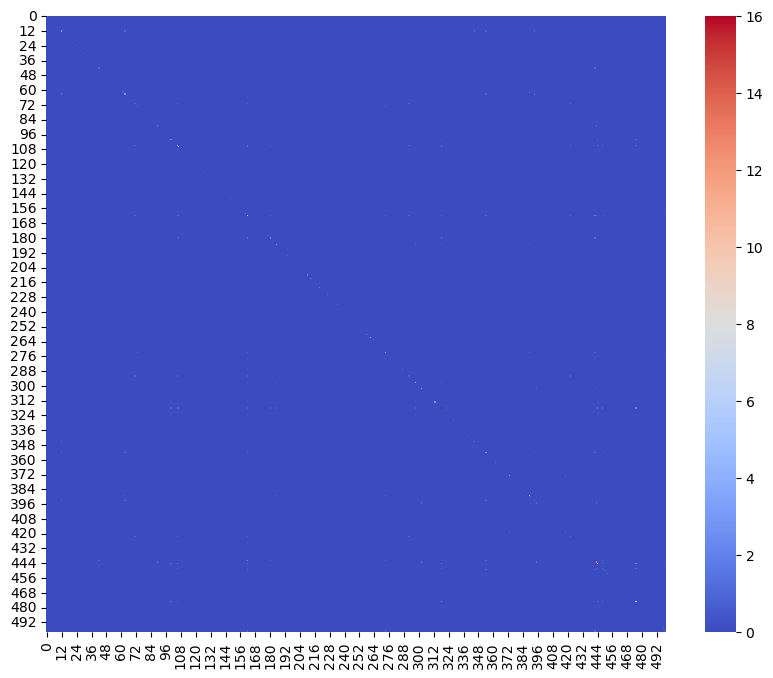

In [9]:
df = pd.DataFrame(co_occurrence_matrix)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df, cmap='coolwarm', ax=ax)
plt.show()

L'algorithme des k-médoïdes pour regrouper les documents en 20 classes.

In [10]:
kmedoids = KMedoids(n_clusters=20).fit(tfidf)

c:\Users\otoure\AppData\Local\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\otoure\AppData\Local\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\otoure\AppData\Local\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
c:\Users\otoure\AppData\Local\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(
c:\Users\otoure\AppData\Local\an

In [11]:
kmedoids.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

L'algorithme des k-means pour regrouper les documents en 20 classes.

In [12]:
kmeans = KMeans(n_clusters=20).fit(tfidf)

c:\Users\otoure\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
kmeans.labels_

array([16,  5,  6, ..., 15, 11, 19])

Les mots et les documents à l'aide de SVD (Analyse sémantique latente), t-SNE et UMAP.

In [14]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(tfidf)

tsne = TSNE(n_components=2, init ='random')
X_tsne = tsne.fit_transform(X_svd)

uma = UMAP(n_components=2)
X_uma = uma.fit_transform(X_svd)

Word2vec pour créer des plongements de mots, puis visualisez-les à l'aide de t-SNE et UMAP.

In [15]:
sentences = [doc.split() for doc in newsgroups.data]
model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])
word_vectors_tsne = tsne.fit_transform(word_vectors)
word_vectors_uma = uma.fit_transform(word_vectors)

Visualisation des plongements (embeddings)

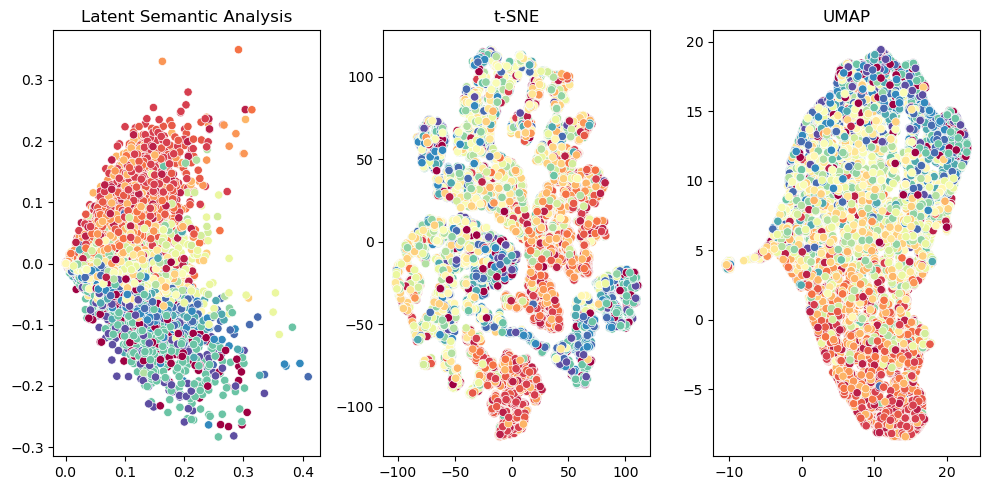

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=newsgroups.target, palette='Spectral', legend=False)
plt.title('Latent Semantic Analysis')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=newsgroups.target, palette='Spectral', legend=False)
plt.title('t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_uma[:, 0], y=X_uma[:, 1], hue=newsgroups.target, palette='Spectral', legend=False)
plt.title('UMAP')

plt.tight_layout()
plt.show()


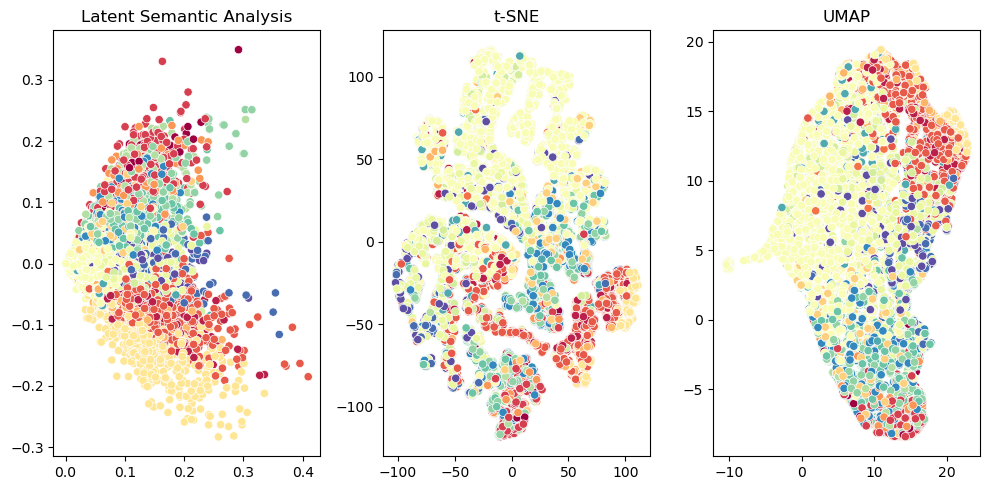

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=kmeans.labels_, palette='Spectral', legend=False)
plt.title('Latent Semantic Analysis')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_, palette='Spectral', legend=False)
plt.title('t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_uma[:, 0], y=X_uma[:, 1], hue=kmeans.labels_, palette='Spectral', legend=False)
plt.title('UMAP')

plt.tight_layout()
plt.show()


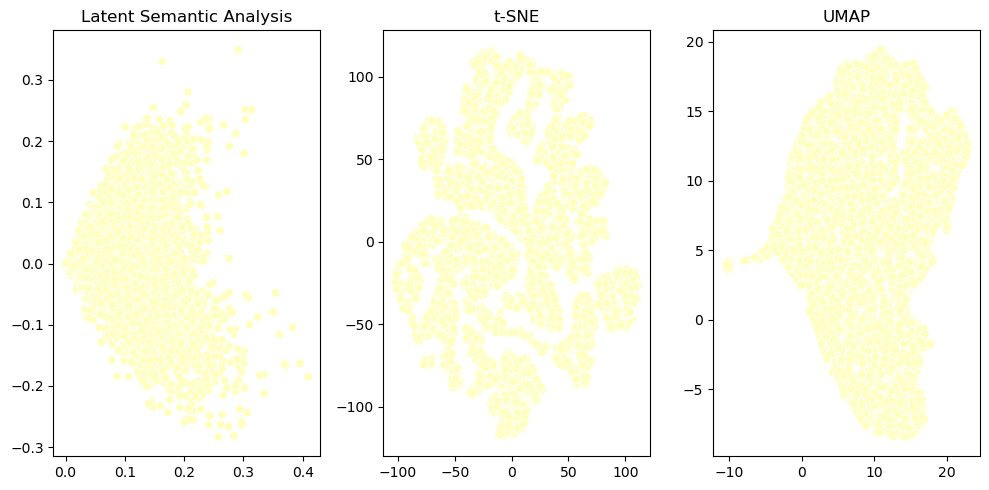

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=kmedoids.labels_, palette='Spectral', legend=False)
plt.title('Latent Semantic Analysis')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmedoids.labels_, palette='Spectral', legend=False)
plt.title('t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_uma[:, 0], y=X_uma[:, 1], hue=kmedoids.labels_, palette='Spectral', legend=False)
plt.title('UMAP')

plt.tight_layout()
plt.show()


## Sentence generation